<a href="https://colab.research.google.com/github/enriqueasegura/Exercises/blob/master/HW4_PH4200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np   #matrix/array
import pandas as pd  #Data analysis
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

#Task 1

1.	Read the file ‘Concrete_Data.xls’ into a pandas dataframe called ‘concrete’ and display the first three rows.
2. Display five rows chosen randomly.
3. How many rows and column are there?
4. What is the max, min, and std of the values in the last column?
5. Sort the values in the last column in ascending order.
6. Display the 3rd and 5th columns
7. Using loc, display the elements in that are simultaneously in the first and third rows and the second and fourth columns.
8. Change the tpe of the values in ‘Age(day)’ column to float.
9. Using iloc, display the elements that are simultaneously in rows 4 and 5 and columns 2 and 5.
10. Plot a histogram of the values in the last column.


In [0]:
#get the file you need. 

from google.colab import files
uploaded = files.upload()

Saving Concrete_Data.xls to Concrete_Data.xls


In [0]:
concrete_data = pd.read_excel("Concrete_Data.xls")

concrete_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [0]:
#random five rows

rnd_rows = np.random.randint(1030, size=5)
print('Random Indexes for Random Rows: ', rnd_rows)
concrete_data.iloc[rnd_rows]

Random Indexes for Random Rows:  [184 492 170 448 851]


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
184,222.36,0.0,96.67,189.29,4.46,967.08,870.32,3,11.576302
492,387.00,20.0,94.00,157.00,13.93,938.00,845.00,7,45.898417
170,388.60,97.1,0.00,157.90,12.10,852.10,925.70,91,57.598825
448,167.35,129.9,128.62,175.46,7.79,1006.30,746.60,56,51.724490
851,160.00,188.0,146.00,203.00,11.00,829.00,710.00,28,32.839742


In [0]:
#find out the dimensions of this matrix that is the spreadsheet

concrete_data.shape #this contains n x m dimensions
print('Rows: ', concrete_data.shape[0])
print('Columns: ', concrete_data.shape[1])

Rows:  1030
Columns:  9


In [0]:
#what are the min, max, and std of the values of the last column? 
#first, let's get the last column 

last_column = concrete_data['Concrete compressive strength(MPa, megapascals) ']
print('last column:')
last_column

last column:


0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [0]:
max_lc = last_column.max()
print('max of this column: ',max_lc)
min_lc = last_column.min()
print('min of this column: ',min_lc)
std_lc = last_column.std()
print('std of this column: ', std_lc)

max of this column:  82.5992248
min of this column:  2.331807832
std of this column:  16.70567917486794


In [0]:
#sort this column's entry in ascending order
#according to docs:
#ascending bool, default True
#If True, sort values in ascending order, otherwise descending.

print('unsorted column:')
display(last_column)

sorted_lc = last_column.sort_values(ascending=True)
print('sorted column:')
display(sorted_lc)

unsorted column:


0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

sorted column:


688     2.331808
705     3.319827
652     4.565021
668     4.782206
717     4.827711
         ...    
159    79.400056
0      79.986111
153    80.199848
381    81.751169
181    82.599225
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [0]:
#display 3rd and 5th column

cols_names = concrete_data.columns

for c in range(len(cols_names)):
  if c == 3 or c == 5:
    print(cols_names[c])

print('3rd and 5th Columns:')
concrete_data[[cols_names[3], cols_names[5]]]

Water  (component 4)(kg in a m^3 mixture)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
3rd and 5th Columns:


,Water (component 4)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture)
0,162.0,1040.0
1,162.0,1055.0
2,228.0,932.0
3,228.0,932.0
4,192.0,978.4
...,...,...
1025,179.6,870.1
1026,196.0,817.9
1027,192.7,892.4
1028,175.6,989.6


In [0]:
"""
Using loc, display the elements in that are simultaneously in the first
and third rows and the second and fourth columns.

Change the tpe of the values in ‘Age(day)’ column to float. 

#this is weird because there is no Age(day) column on this thing.

Using iloc, display the elements that are simultaneously in rows 4 and 5 and columns 2 and 5.

Plot a histogram of the values in the last column.

"""

#first, get the 1st, 2nd, 3rd, and 4th column using loc
for c in range(len(cols_names)):
  if c > 0 and c < 5:
    print(cols_names[c])

data_2nd_3rd_4th_cols = concrete_data.loc[:, 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Superplasticizer (component 5)(kg in a m^3 mixture)']
print('data for those columns:')
display(data_2nd_3rd_4th_cols)

#now let's get all the values that are in the data set selected
#source : https://stackoverflow.com/questions/15315452/selecting-with-complex-criteria-from-pandas-dataframe
#source : https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python


common_data = data_2nd_3rd_4th_cols.loc[ (data_2nd_3rd_4th_cols['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] ==
                                          data_2nd_3rd_4th_cols['Superplasticizer (component 5)(kg in a m^3 mixture)'] )]
common_data = data_2nd_3rd_4th_cols[data_2nd_3rd_4th_cols.duplicated(keep=False)]

print('Duplicated Items:')
common_data

Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Fly Ash (component 3)(kg in a m^3 mixture)
Water  (component 4)(kg in a m^3 mixture)
Superplasticizer (component 5)(kg in a m^3 mixture)
data for those columns:


,Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture)
0,0.0,0.0,162.0,2.5
1,0.0,0.0,162.0,2.5
2,142.5,0.0,228.0,0.0
3,142.5,0.0,228.0,0.0
4,132.4,0.0,192.0,0.0
...,...,...,...,...
1025,116.0,90.3,179.6,8.9
1026,0.0,115.6,196.0,10.4
1027,139.4,108.6,192.7,6.1
1028,186.7,0.0,175.6,11.3


Duplicated Items:


,Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture)
0,0.0,0.0,162.0,2.5
1,0.0,0.0,162.0,2.5
2,142.5,0.0,228.0,0.0
3,142.5,0.0,228.0,0.0
4,132.4,0.0,192.0,0.0
...,...,...,...,...
948,145.0,113.0,178.5,8.0
966,0.0,142.8,193.3,9.1
967,183.4,0.0,193.3,9.1
977,145.0,0.0,178.5,8.0


In [0]:
#Using iloc, display the elements that are simultaneously in rows 4 and 5 and columns 2 and 5. 
#ok let's get the data required for this task

r_data = concrete_data.iloc[4:6,[2,5]]

r_data

,Fly Ash (component 3)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture)
4,0.0,978.4
5,0.0,932.0


In [0]:
concrete_data[:10]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [0]:
#let's change the type of the age day column 

concrete_data['Age (day)'] = concrete_data['Age (day)'].astype(np.float16)
display(concrete_data['Age (day)'] )

0        28.0
1        28.0
2       270.0
3       365.0
4       360.0
        ...  
1025     28.0
1026     28.0
1027     28.0
1028     28.0
1029     28.0
Name: Age (day), Length: 1030, dtype: float16

Resulting Histogram Using Pandas and not Numpy or Matplotlib libraries:


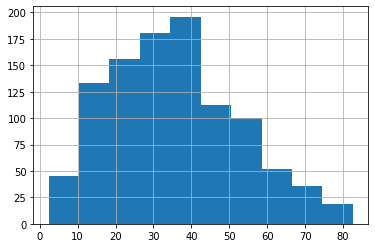

In [0]:
#make a nice histogram of the values on the last column
print('Resulting Histogram Using Pandas and not Numpy or Matplotlib libraries:')
last_column.hist()

#Task 2 

1. Read the file ‘casp.csv’ into a pandas dataframe and display rows 7 through 12.
2. Move the column ‘RMSD’ to the end, i.e., make it the last column.
3. The dataset is ‘Physicochemical Properties of Protein Tertiary Structure.’ Locate the dataset in the UCI repository and briefly explain what the features F1 through F9 represent.
4. What is the max, min, and std of RMSD values?
5. How many rows and column are in the dataset?
6. Sort the RMSD values in descending order
7. Plot a histogram of RMSD values.
8. Read the file ‘wifi_localization.txt’ into a pandas dataframe and display statistics (min, max, percentiles, etc.) for all columns in the dataframe.
9. What are the unique values in the last column?
11. Make a bar plot of the values in the last column.
12. Split the data into train and test sets.
13. Use K-nearest neighbors with K = 1, 5, 10 to train the KNN classification model and find how well the model does on the test set.


In [0]:
#let's do the easy part, let's read some data 
#get the files we need up!
uploaded = files.upload()

Saving casp.csv to casp.csv


In [0]:
casp_data =pd.read_csv('casp.csv')
print('This is the file:')
display(casp_data)

This is the file:


,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
...,...,...,...,...,...,...,...,...,...,...
45725,3.762,8037.12,2777.68,0.34560,64.3390,1.105797e+06,112.7460,3384.21,84,36.8036
45726,6.521,7978.76,2508.57,0.31440,75.8654,1.116725e+06,102.2770,3974.52,54,36.0470
45727,10.356,7726.65,2489.58,0.32220,70.9903,1.076560e+06,103.6780,3290.46,46,37.4718
45728,9.791,8878.93,3055.78,0.34416,94.0314,1.242266e+06,115.1950,3421.79,41,35.6045


In [0]:
#this is the size of the spreadsheet:

#find out the dimensions of this matrix that is the spreadsheet

casp_data.shape #this contains n x m dimensions
print('Rows: ', casp_data.shape[0])
print('Columns: ', casp_data.shape[1])

Rows:  45730
Columns:  10


In [0]:
#now here's the data we want

casp_data_r7_r12 = casp_data.iloc[7:13]
print('requested data from row 7 to row 12:')
display(casp_data_r7_r12)

requested data from row 7 to row 12:


,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916
9,1.495,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140
10,12.118,6556.77,1612.77,0.24597,71.6315,8.915443e+05,93.5329,3161.33,76,38.0433
11,0.884,8828.21,2658.63,0.30115,90.8578,1.233384e+06,123.6860,3194.30,22,37.2413
12,7.913,5637.37,2665.83,0.47288,49.8566,7.716355e+05,95.7431,2177.61,7,41.5268


In [0]:
#now let's use the drop operator 

#casp_data = casp_data.drop(columns=['RMSD'])

In [0]:

print('show the spreadsheet without the first column:')
display(casp_data)


show the spreadsheet without the first column:


,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
...,...,...,...,...,...,...,...,...,...,...
45725,3.762,8037.12,2777.68,0.34560,64.3390,1.105797e+06,112.7460,3384.21,84,36.8036
45726,6.521,7978.76,2508.57,0.31440,75.8654,1.116725e+06,102.2770,3974.52,54,36.0470
45727,10.356,7726.65,2489.58,0.32220,70.9903,1.076560e+06,103.6780,3290.46,46,37.4718
45728,9.791,8878.93,3055.78,0.34416,94.0314,1.242266e+06,115.1950,3421.79,41,35.6045


In [0]:
#very low tech way to this since i at the moment can't do it pretty 
string_n = []
string_n.append('RMSD')
for i in range(1,10):
  string_n.append('F'+str(i))

new_casp_data = casp_data[string_n]

new_casp_data

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
...,...,...,...,...,...,...,...,...,...,...
45725,3.762,8037.12,2777.68,0.34560,64.3390,1.105797e+06,112.7460,3384.21,84,36.8036
45726,6.521,7978.76,2508.57,0.31440,75.8654,1.116725e+06,102.2770,3974.52,54,36.0470
45727,10.356,7726.65,2489.58,0.32220,70.9903,1.076560e+06,103.6780,3290.46,46,37.4718
45728,9.791,8878.93,3055.78,0.34416,94.0314,1.242266e+06,115.1950,3421.79,41,35.6045


In [0]:
#max, min, std of RMSD column

rmsd_col = casp_data['RMSD']
print('max: ', rmsd_col.max(), 'min: ', rmsd_col.min(), 'std: ', rmsd_col.std())

#sort rmsd data in descending order
rmsd_col.sort_values(ascending=True)

max:  20.999000000000002 min:  0.0 std:  6.118311675422008


19971     0.000
39537     0.000
8434      0.000
25508     0.000
18505     0.000
          ...  
8570     20.997
36885    20.997
35583    20.998
37503    20.999
9727     20.999
Name: RMSD, Length: 45730, dtype: float64

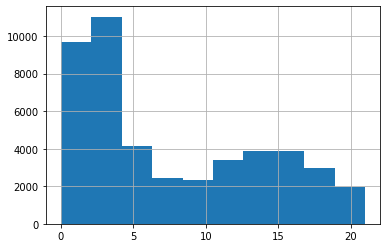

In [0]:
#histogram of RMSD column 
rmsd_col.hist()

In [0]:
"""
Read the file ‘wifi_localization.txt’ into a pandas dataframe and display statistics (min, max, percentiles, etc.) for all columns in the dataframe.
What are the unique values in the last column?
Make a bar plot of the values in the last column.

#ML part of the hw:

Split the data into train and test sets.
Use K-nearest neighbors with K = 1, 5, 10 to train the KNN classification model and find how well the model does on the test set.
"""

uploaded = files.upload()


Saving wifi_localization.txt to wifi_localization.txt


In [0]:
wifi_data = pd.read_csv('wifi_localization.txt', sep="\t", header=None)

wifi_data

,0,1,2,3,4,5,6,7
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [0]:
print('Col: ', 'Max Value',  'Min Value', 'Standard Deviation:')
for i in range(len(wifi_data.columns)):
  print(i, '\t', np.max(wifi_data[i]),'\t', np.min(wifi_data[i]),'\t', np.std(wifi_data[i])  )

Col:  Max Value Min Value Standard Deviation:
0 	 -10 	 -74 	 11.318845778170168
1 	 -45 	 -74 	 3.4168330000162492
2 	 -40 	 -73 	 5.314856912467212
3 	 -11 	 -77 	 11.469114078689774
4 	 -36 	 -89 	 9.102816034063306
5 	 -61 	 -97 	 6.515042210147231
6 	 -63 	 -98 	 6.518182089355891
7 	 4 	 1 	 1.118033988749895


In [0]:
#unique value in this columns

unique_values = wifi_data[7].unique()
print('unique values: ', unique_values)

unique values:  [1 2 3 4]


In [0]:
data = []

for i in wifi_data[7]:
  data.append(i)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [0]:
#Use K-nearest neighbors with K = 1, 5, 10 to train the KNN classification model and find how well the model does on the test set.
#split the set into two sets 
#I am going to follow CS231n tutorial to be able to reproduce the results with this data
#http://cs231n.github.io/classification/#nn

X = wifi_data.iloc[:,:-1].values # take first 1000 for validation
y = wifi_data.iloc[:,-1].values
print(y)

[1 1 1 ... 4 4 4]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [0]:
k = np.arange(1,16,1)
print('k list:', k)
acc = []

for i in k:
  curr_kn = KNeighborsClassifier(n_neighbors=i)
  curr_kn.fit(X_train, y_train)
  curr_predict = curr_kn.predict(X_test)
  curr_accuracy = metrics.accuracy_score(y_test, curr_predict)
  acc.append(curr_accuracy)

k list: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [0]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf


! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

--2020-02-25 18:32:13--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2020-02-25 18:32:14--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  9

#Fit of KNN as K increases

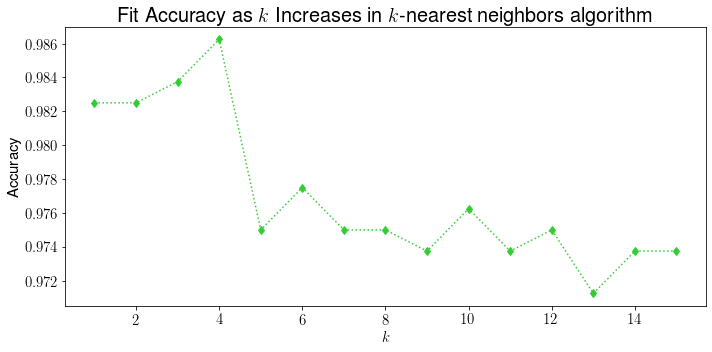

In [0]:
plt.figure(figsize=(10,5))
plt.plot(k, acc, marker='d', color='limegreen', linestyle=':')

plt.xlabel(r'$k$', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title(r'Fit Accuracy as $k$ Increases in $k$-nearest neighbors algorithm', fontsize=20)

plt.tick_params(axis='both', labelsize=15)
plt.tight_layout()